# K-means聚类算法的实现与应用

## 一、实验简介

### （一）问题描述
K-means聚类算法的主要思想是：将所有输入的数据划分成为K个子集合，并且要求每个子集合内各个元素之间的差异性尽可能的小，而不同子集合间元素的差异性尽可能的大。

K-maens算法是聚类算法的一种，一般应用于维度、数值都比较小且连续的数据集中，比如，从随机分布的事物集合中将相同事物进行分组。聚类算法除了K-means算法外还有其他聚类算法，比如，基于密度的聚类算法、基于高斯混合模型的最大期望聚类算法。由于K-means算法的解释性强、计算简单、易于理解等优点使它成为本实验中最合适的聚类算法。

本实验将对K-means聚类算法原理进行介绍，并根据原理构建算法的实现思路。按照算法实现思路，借助Python编程语言，以及相关科学计算包实现算法。实现好的算法将应用到手动生成的数据集中，对这个数据集的数据进行聚类。

## 二、 实验任务与要求
本实验首先根据K-means聚类算法原理设计并实现K-means聚类算法模型，然后将实现好的模型应用到手动生成的数据集中做聚类。具体实验要求如下：

1.算法实现：对K-means聚类算法原理简单介绍，再采用面向对象程序设计的思想实现K-means聚类算法。

2.算法应用：加载数据，将数据集按8：2的比例划分为训练集和测试集，使用训练集数据分别训练k值为3、5、7时的K-means聚类算法模型，得到训练集的簇中心，将训练完成的算法模型对测试集进行聚类。

3.应用效果可视化：将聚类结果用不同颜色标记并进行可视化，同时标出每个簇的簇中心。

## 三、实验步骤  

### （一）算法实现
1.算法原理

对于给定的样本集，按照样本之间的距离大小，将样本集划分为K个簇。让簇内的点尽量紧密的连在一起，而让簇间的距离尽量的大。假设需要将样本集划为k个簇（$C_1$,$C_2$,...$C_k$），每个簇都有一个簇中心，则目标是最小化簇内所有样本与簇中心的平方误差：
$$Loss = \sum_{i=1}^k\sum_{x \in C_i}||x-\mu_i||^2_2$$(式中的k是簇的数量，$C_i$是簇内样本，$x$是单个样本，$\mu_i$是簇中心，也可以说是簇内样本均值，$||z||^2_2$是求z向量的大小的平方)，上式中的簇中心求解公式：$$\mu_i = \frac1{|C_i|}\sum_{x \in C_i}x$$

2.算法实现

定义一个K-meanss算法类KMeans，该算法类的主要方法是算法模型的训练方法(fit()函数)和预测方法(predict()函数)。

- fit()函数的流程如下：   
（1）初始化选择k个簇中心，本算法选取训练集数据中的前k个样本数据做为簇中心；  
（2）对于k个簇，求离其最近的样本，并将这些样本划分到该簇中；  
（3）对于每个簇，更新簇中心的向量（求簇内的样本的属性的均值）；  
（4）重复2~3步骤直到算法收敛，或者迭代到了指定的次数为止，得到k个簇中心向量。  

- predict()函数的流程如下：    
（1）对输入数据的每一个样本计算与k个簇中心的距离，选择距离最近的簇作为该样本数据的类属。

算法实现代码如下：

In [2]:
import operator
import numpy as np#科学计算包
import copy
import matplotlib.pyplot as plt#画图包

In [45]:
class KMeans:
    def __init__(self, k,max_iter=20):
        """
        :param k: int，簇的数量（数据集要聚成多少类）
        :param max_iter: int，聚类的最大迭代数
        """
        self._k = k      #簇的数量
        self._max_iter = max_iter        #聚类迭代次数
    
    def init_centers(self,k, dataset):
        """
        初始化簇中心：
        选取数据集中的前k个样本数据作为簇中心
        :param k：int，簇的个数
        :param dataset：ndarray，数据集
        """
        self.center_dict = {}
        for i in range(k):
            self.center_dict[i] = dataset[i]
   
    def get_centers(self):
        """
        获取簇中心：
        主要用于外部实例化对象调用
        """
        return self.center_dict
    
    def calc_dist(self,simple1, simple2):
        """
        计算距离：
        该函数是计算两个点之间的欧式距离，该函数首先将点转为向量的形式，之后用norm()函数求向量的大小。
        :param simple1：ndarray，第一个样本点的位置
        :param simple2：ndarray，第二个样本点的位置
        """
        return np.linalg.norm(simple1-simple2) 
    
    
    def fit(self, x): 
        """
        模型拟合：（模型训练）
        给数据集的最后一列插入默认为-1的类标签，通过循环不断更新簇中心，同时也不断改变数据集的类标签，直到迭代次数达到最大迭代次数或
        所有类簇内距离总和两次都不变时为止,最终得到数据集训练出来的每类的簇中心。
        :param x：ndarray，样本数据
        """
        ds = copy.deepcopy(x)  # 复制一份数据
        epoch = 0 # 迭代次数
        self.init_centers(self._k, ds)  # 第一次迭代时，初始化k个聚类中心
    
        ds = np.insert(ds, 2, values=-1, axis=1)  # 插入一列作为类标签，默认为-1
        total_last = np.inf  # 上一次迭代距离总和
        while epoch <= self._max_iter:  # 迭代次数少于20次时继续迭代，也可以直接设为True，当目标函数已收敛时自动结束迭代
            cluster_dist = {i:0 for i in range(self._k)}  # 记录每一个类簇距离总和
            for simple in ds:
                min_dist = np.inf   # simple 到最近的聚类中心的距离
                min_label = -1    # 最近的聚类中心类标签
                for label in self.center_dict.keys():
                    dist = self.calc_dist(simple[:2], self.center_dict[label])
                    if dist < min_dist:
                        min_dist = dist
                        min_label = label
                simple[2] = min_label  # 将当前样本点划分到最近的聚类中心所在聚类中
                cluster_dist[int(min_label)] = cluster_dist[int(min_label)] + min_dist  # 更新类簇内部距离总和
            
            loss_now = sum(cluster_dist.values())  # 所有类簇内部距离总和
            if total_last == loss_now:  # 如果两次迭代距离总和都不变，证明已收敛，跳出循环
                break
            total_last = loss_now         #将当前所有类簇内距离作为上一个所有类簇内距离
            
            for label in self.center_dict.keys():  # 更新簇中心
                simple_list = ds[ds[:,2]==label]  # 挑选出类标签为k的所有样本
                x = np.mean(simple_list[:, 0])     #求同类样本数据第一列特征数据的均值
                y = np.mean(simple_list[:, 1])
                self.center_dict[label] = [x, y]      #更新簇中心
            epoch += 1
    
    def predict(self, arr_data): 
        """
        模型预测：
        预测新数据属于哪个类，注意这个类是零时类、假想类
        :param arr_data：ndarray，样本数据
        """
        ret_lst_label =[]         #存储预测值的列表
        for sample in arr_data:   #迭代数据集
            lst_d = []
            for key in self.center_dict:  #迭代每类的簇中心
                d = self.calc_dist(sample, self.center_dict[key])  #计算每个样本数据与簇中心的距离
                lst_d.append(d)                 
            index_min = np.argmin(lst_d)          #获取列表中最小值的索引
            label = list(self.center_dict.keys())[index_min]  #得到该样本数据所属的类
            ret_lst_label.append(label)         #添加到预测值列表中去
        return ret_lst_label          

### （二）算法应用
本阶段操作内容：   
本阶段首先将手动生成的三批数据合成一批后按8：2划分为训练集和测试集，然后借助本实验中编写好的聚类算法模型对训练集进行学习，得到簇中心，之后用测试集数据进行聚类测试。 

1.数据介绍

本阶段所要用到的数据集是手工制作的，总共生成了3批数据，每批包含300个样本数据，每个样本数据有两个属性，每个属性的数据是由不同均值，同一方差的高斯函数生成的，不同批样本数据间属性数据的均值差别较大，同批样本数据中属性数据均值相差较小。下面分别介绍三批数据各属性数据高斯分布的均值和方差： 

|数据批数|属性一均值与方差|属性二均值与方差|数据个数|
|----|----|----|----|
|第一批|（20，5）|（15，5）|300|
|第二批|（20，5）|（45，5）|300|
|第三批|（55，5）|（35，5）|300| 

2.准备数据

In [3]:
#加载数据集
#此处加载的数据的后缀名是.npy（numpy数组的形式存储），因此可以直接利用numpy中的数据加载函数load()
dataset = np.load('cluster_data.npy')
dataset

array([[15.21463184, 12.29092872],
       [16.262212  , 14.32859304],
       [21.3162269 , 16.94888624],
       ...,
       [52.47721485, 22.75527241],
       [53.74069109, 34.88667789],
       [53.69980451, 31.21975526]])

数据划分是对总数据集的行顺序进行随机重置，将重置后的样本数据的前80%作为训练集数据，剩余的20%作为测试集数据。  
将训练集数据和测试集数据的第一个属性作为x轴，第二个属性作为y轴，用散点图的形式进行可视化。

In [12]:
np.random.shuffle(dataset)
index_split = int(dataset.shape[0]*0.8)   #获取数据集在80%处的样本索引
#划分训练集和测试集
train_X = dataset[:index_split]
test_X = dataset[index_split:]

3.数据可视化  
对原数据的分布进行散点图可视化，用于对比后面的模型应用效果的可视化图。

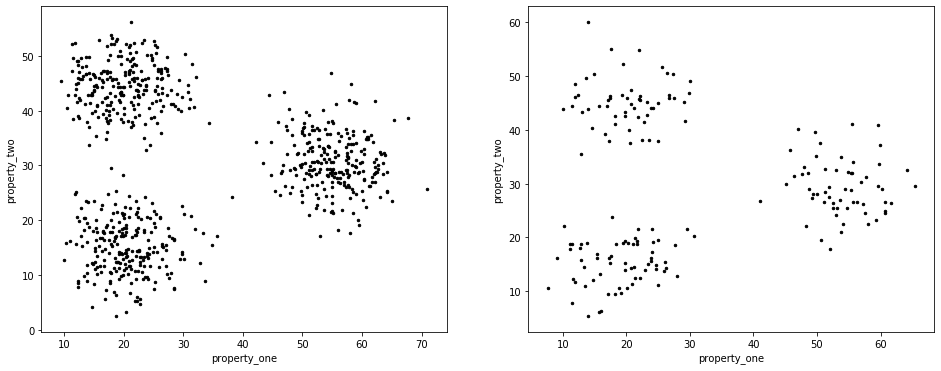

In [28]:
plt.figure(figsize=(16, 6))    #定义画布大小，20是画布的宽，8是画布的高
plt.subplot(121)               #定义子图121表示这组图有1行2列，该子图在第1幅图
for i in train_X:
    plt.scatter(i[0], i[1],c='black',s=6)     
plt.xlabel('property_one')          #设置x坐标
plt.ylabel('property_two')

plt.subplot(122)
for i in test_X:
    plt.scatter(i[0], i[1],c='black',s=6)
plt.xlabel('property_one')
plt.ylabel('property_two')
plt.show()

4.模型训练、预测

In [36]:
#模型调用
model1 = KMeans(3)
model2 = KMeans(5)
model3 = KMeans(7)

#模型训练
model1.fit(train_X)
model2.fit(train_X)
model3.fit(train_X)

#模型预测
pred1 = model1.predict(test_X)
pred2 = model2.predict(test_X)
pred3 = model3.predict(test_X)

### （三）应用效果可视化
本阶段操作：  
K-means算法是无监督学习算法，所用到的样本是没有标签的，因此不易了解样本数据聚类的实际情况，需要对聚类后不同类样本数据用不同颜色的点进行可视化观测。

下面用3个子图分别可视化k值为3、5、7时K-means聚类算法模型对测试集的聚类结果（不同类别样本用不同颜色表示），以及每个簇的簇中心（用黑点表示）。此处是编写了一个draw_pred_result（date,pred,centers_dic,plt）函数，用来可视化单个k值模型的聚类结果，其参数解释如下：
    
    data：数据集；
    pred：聚类结果；
    centers_dic：每个簇的簇中心（字典结构）；
    plt：画子图的对象。

In [47]:
def draw_pred_result(date,pred,centers_dic,plt):
    color = ['red','green','blue','yellow','orange','pink','cyan']    #由于这里最大聚成7个簇，因此这里设置了7中颜色
    #画每个簇的样本
    for index,i in enumerate(pred):                        #迭代pred的值并获取其值的索引
        plt.scatter(date[index,0], date[index,1],c=color[i],s=6)
     #画簇中心
    for key in centers_dic:                     
        plt.scatter(centers_dic[key][0], centers_dic[key][1],c='black')
    plt.xlabel('property_one')
    plt.ylabel('property_two')

Text(0.5, 1.0, 'k=7')

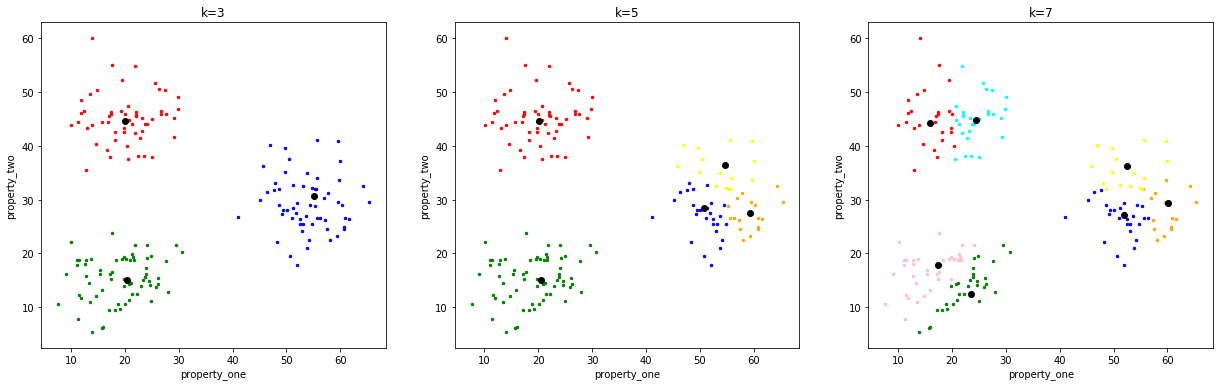

In [48]:
plt.figure(figsize=(21, 6))    #定义画布大小，20是画布的宽，8是画布的高
plt.subplot(131)               #定义子图121表示这组图有1行2列，该子图在第1幅图
draw_pred_result(test_X,pred1,model1.get_centers(),plt)
plt.title('k=3')
plt.subplot(132)               #定义子图121表示这组图有1行2列，该子图在第1幅图
draw_pred_result(test_X,pred2,model2.get_centers(),plt)
plt.title('k=5')
plt.subplot(133)               #定义子图121表示这组图有1行2列，该子图在第1幅图
draw_pred_result(test_X,pred3,model3.get_centers(),plt)
plt.title('k=7')

## 五、结果分析

在次实验中首先对K-means算法原理进行了介绍，然后根据算法的原理实现了算法的训练、预测等功能，最后将搭建好的算法模型以不同的K值（k=3、5、7)应用到手动制作的数据集中，并对这几个算法模型的聚类结果进行了可视化，从可视化图可以看出，该测试集数据聚成三个簇比较合适。结合原理，该算法在训练时，首先初始化簇中心，之后迭代计算簇内样本的均值更新簇中心；在对测试集进行预测时，选取离其最近的簇中心作为样本标签类，整个过程并没有表达如何选取合适的K值，因此该算法有个较大的缺点就是需要手动选取K值。然而手动选取就如上面可视化的三幅图一样，有可能是合适的，也有可能都不合适。

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [15]:
data = load_iris()

In [18]:
data.data,data.target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [19]:
data_x = data.data

In [20]:
model = KMeans(n_clusters=3)

In [21]:
model.fit(data_x)

KMeans(n_clusters=3)

In [22]:
model.labels_#预测出来的标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [24]:
data.target#真实的标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
data.target_names#标签的名称

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')